# Indoor Positioning Analysis

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import pandas
import os
from Point import create_points_from_dataframe
from Session import Session
import math
import numpy as np
from ipywidgets import interact

In [23]:
# get the csv with pozyx data, turn it into a dataframe
pozyx_filename = "/pozyx_scavenger_hunt.csv"
dir_path = os.path.dirname(os.path.realpath('pozyx_scavenger_hunt.csv'))

In [24]:
df = pandas.read_csv(dir_path+pozyx_filename)

In [25]:
# all_tag_names = list(df.tag.unique())
tag_names = ['0x6734', '0x6724', '0x6750', '0x6e36']
delim = '0x6e36'
df = df[df.tag.isin(tag_names)]

In [26]:
# get the points from the dataframe
points = create_points_from_dataframe(df)

In [27]:
# create a session from the points
session = Session()
session.set_session_from_points(points, delim)

{'2019-04-05 22:15:39': [tag: 0x6e36
 x: -2404
 y: 8423
 timestamp: 2019-04-05 22:15:39, tag: 0x6724
 x: -3502
 y: 7417
 timestamp: 2019-04-05 22:15:40, tag: 0x6750
 x: -1075
 y: 7305
 timestamp: 2019-04-05 22:15:41]
 start time: 2019-04-05 22:15:39, '2019-04-05 22:15:42': [tag: 0x6e36
 x: -2255
 y: 8510
 timestamp: 2019-04-05 22:15:42, tag: 0x6724
 x: -3577
 y: 7492
 timestamp: 2019-04-05 22:15:43, tag: 0x6734
 x: 0
 y: 0
 timestamp: 2019-04-05 22:15:44, tag: 0x6750
 x: -1184
 y: 7183
 timestamp: 2019-04-05 22:15:44]
 start time: 2019-04-05 22:15:42, '2019-04-05 22:15:45': [tag: 0x6e36
 x: -2023
 y: 8656
 timestamp: 2019-04-05 22:15:45, tag: 0x6724
 x: -4247
 y: 7758
 timestamp: 2019-04-05 22:15:45, tag: 0x6750
 x: -1444
 y: 8537
 timestamp: 2019-04-05 22:15:47]
 start time: 2019-04-05 22:15:45, '2019-04-05 22:15:48': [tag: 0x6e36
 x: -2291
 y: 8651
 timestamp: 2019-04-05 22:15:48, tag: 0x6724
 x: -4133
 y: 9320
 timestamp: 2019-04-05 22:15:48, tag: 0x6750
 x: 0
 y: 0
 timestamp: 2019

## Animate session
The "session" is visualized by placing the points of all the relevant tags on the graph for a given grouping, delimited by the most commonly appearing tag id (delim). Animating it is visualizing the clusters from the time of the first to the end (so looking at the sesssions). 

In [28]:
def animate_session(x):
    tcs = session.time_clusters
    conns_freq = {}
    frames = len(tcs.keys())

    G = nx.Graph()
    ts = list(tcs.keys())[x]
    tc = tcs[ts].get_dict_from_points()
    G.add_nodes_from(tc)

    nx.draw(G, tc, with_labels=True, node_size=20)
    plt.draw()
    plt.show()        

In [29]:
interact(animate_session, x=(0,len(session.time_clusters)-1,1))

interactive(children=(IntSlider(value=183, description='x', max=367), Output()), _dom_classes=('widget-interac…

<function __main__.animate_session(x)>

## Distance Traveled 
This snippet below caluclates the distances people traveled (in millimeters).

In [30]:
def get_xy(p, tag):
    if p.tag == tag:
        return (p.x, p.y)

In [31]:
avg_dists = {'0x6734': 0, '0x6724': 0, '0x6750': 0, '0x6e36': 0}
for tag in tag_names:
    tag_coords = [get_xy(p, tag) for p in points]
    tag_coords = list(filter(None, tag_coords))
    x = [j[0] for j in tag_coords]
    y = [k[1] for k in tag_coords]
    for i in range(len(tag_coords)-1):
        avg_dists[tag] = avg_dists[tag] + math.sqrt((x[i+1] - x[i])**2 + (y[i+1] - y[i])**2)
    avg_dists[tag] = avg_dists[tag] / len(tag_coords)


pandas.DataFrame.from_dict(avg_dists, orient='index',columns=['distance (mm)'])

,distance (mm)
0x6734,2175.423856
0x6724,998.291488
0x6750,959.356740
0x6e36,899.483239


## Location Heatmap (Aggregate)
To visualize the locations that were visited most frequently in the space. Points that were visited most frequently are more yellow, and points that were less/not at all frequently visited are in purple. More documentation on histogram2D here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Try changing the values in the dataframe to see different charts.

In [32]:
# change these around to get different graphs
#df = df[0 != df.x]
#df = df[0 != df.y]
df = df[2000 < df.y]

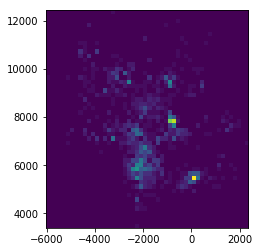

In [33]:
heatmap, xedges, yedges = np.histogram2d(df["x"], df["y"], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()